In [6]:
import time
import numpy as np
import scipy as sp
import pandas as pd
import popsynch as ps
import matplotlib.pyplot as plt

## Empirical Distributions on the Circle

In [2]:
# We specify a distribution as an array of numbers in [0,1). 
n = 10

# generate points and their antipodes
x = np.random.rand(n)

# compute synchrony and the barycenter
synchrony, barycenter = ps.circ_synchrony(x)

print(f'Synchrony of random empirical distribution: {synchrony}, Barycenter: {barycenter}')

Synchrony of random empirical distribution: 0.11874524414547938, Barycenter: 0.587109453023303


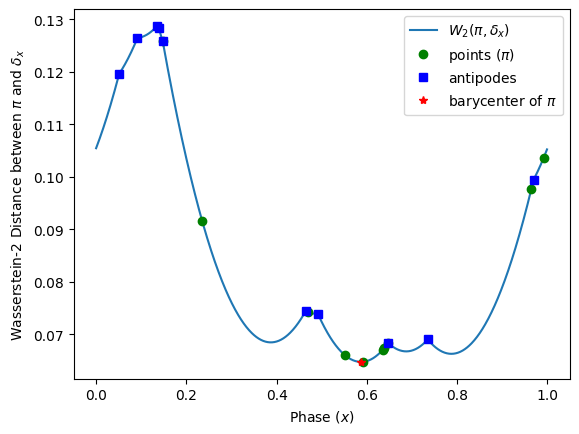

In [3]:
# The Wasserstein-2 distance from an empirical distribution to delta distribution is convex on between adjacent antipodal points. 
# This allows for efficient determination of the barycenter and generalized variance of an empirical distibution on the circle.

antip = np.unique((x + 1/2) %1)

# plot a fine approximation of the distance to delta distribution over the interval [0,1)
num_del = 1000
x_deltas = np.linspace(0,1-1/num_del,num_del)
dists = np.zeros(num_del)
dists2 = np.zeros(num_del)
for i in range(num_del):
    # Compute the Wasserstein-2 distance using the specialized method that works when comparing to a deltra distribution
    x_delta = x_deltas[i]
    dists[i] = ps.circ_wassp_to_delta(x, x_delta, p=2)

# find values at points and antipodes
dists_x =  np.zeros(n)
for j in range(n):
    dists_x[j] = ps.circ_wassp_to_delta(x, x[j], p=2)
    
dists_antip = np.zeros(len(antip))
for j in range(len(antip)):
    dists_antip[j] = ps.circ_wassp_to_delta(x, antip[j], p=2)

plt.plot(x_deltas, dists, label=r'$W_2(\pi,\delta_x)$')    

plt.plot(x, dists_x, 'o', color='green', label=r'points ($\pi$)')
plt.plot(antip, dists_antip, 's', color='blue', label='antipodes')
plt.plot(barycenter, (1-synchrony)**2/12, '*', color='red', label=r'barycenter of $\pi$')
plt.xlabel(r'Phase ($x$)')
plt.ylabel(r'Wasserstein-2 Distance between $\pi$ and $\delta_x$')
plt.legend()

plt.show()

In [4]:
# We can either use the 'exact' flag to computing synchrony, which guarantees the barycenter will be found or we can use basinhopping,
# a global optimization algorithm, which does not guarantee correctness but may be faster depending on the number of points in the distribution.

x = np.random.rand(10000)

t0_exact = time.time()
synchrony_exact, barycenter_exact = ps.circ_synchrony(x, method='exact')
t1_exact = time.time()

t0_approx = time.time()
synchrony_approx, barycenter_approx = ps.circ_synchrony(x, method='optimize')
t1_approx = time.time()

print(f'Exact synchony: {synchrony_exact}, Exact Barycenter: {barycenter_exact}, computed in {t1_exact-t0_exact} seconds')

print(f'Appro synchony: {synchrony_approx}, Appro Barycenter: {barycenter_approx}, computed in {t1_approx-t0_approx} seconds')

Exact synchony: 0.008992505603561018, Exact Barycenter: 0.1714317756658277, computed in 1.2730233669281006 seconds
Appro synchony: 0.008992505603561018, Appro Barycenter: 0.171431776939792, computed in 0.4859738349914551 seconds
